# Bibliotecas

In [4]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- -


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Corrigindo erro com PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Lendo o dataset

In [6]:
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [9]:
def load_data():
    
    datasets = ['FaceShape_Dataset/training_set', 'FaceShape_Dataset/testing_set']
    output = []
    
    # Iteração dos datasets de treino e de testes
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iteração com a pasta de cada categoria
        for folder in os.listdir(dataset):
            if folder != "desktop.ini":

                label = class_names_label[folder]


                # Iteração de cada imagem na pasta
                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    if file != "desktop.ini":


                        # Get the path name of the image
                        img_path = os.path.join(os.path.join(dataset, folder), file)
                        
                        try:
                            # Leitura e redirecionamento da imagem
                            image = cv2.imread(img_path)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, IMAGE_SIZE) 

                            # Append da image e do seu label correspondente
                            images.append(image)
                            labels.append(label)
                        except Exception as e:
                            print(f"Broken: {img_path}")
                        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [10]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading FaceShape_Dataset/training_set


 70%|██████▉   | 559/800 [00:12<00:10, 23.47it/s]

Broken: FaceShape_Dataset/training_set\Oblong\oblong (724).jpg


100%|██████████| 800/800 [00:17<00:00, 44.93it/s]


Loading FaceShape_Dataset/testing_set


100%|██████████| 200/200 [00:04<00:00, 49.58it/s]


In [11]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Modelo com CNN usando o Keras

In [12]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0
test_images = test_images / 255.0

Number of training examples: 3999
Number of testing examples: 1000
Each image is of size: (150, 150)


In [13]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(60, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(50, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(50, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(40, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(30, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(65, activation=tf.nn.softmax),
    tf.keras.layers.Dropout(0.2)

])

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=100, validation_split = 0.2)

Epoch 1/100


25/25 [==============================] - 33s 1s/step - loss: 4.9392 - accuracy: 0.1797 - val_loss: 1.9364 - val_accuracy: 0.1912
Epoch 2/100
25/25 [==============================] - 26s 1s/step - loss: 4.5393 - accuracy: 0.2066 - val_loss: 1.7682 - val_accuracy: 0.2113
Epoch 3/100
25/25 [==============================] - 26s 1s/step - loss: 4.5315 - accuracy: 0.1941 - val_loss: 1.7269 - val_accuracy: 0.2062
Epoch 4/100
25/25 [==============================] - 26s 1s/step - loss: 4.3583 - accuracy: 0.2029 - val_loss: 1.7116 - val_accuracy: 0.2488
Epoch 5/100
25/25 [==============================] - 28s 1s/step - loss: 4.3593 - accuracy: 0.2179 - val_loss: 1.6617 - val_accuracy: 0.2188
Epoch 6/100
25/25 [==============================] - 28s 1s/step - loss: 4.2134 - accuracy: 0.2266 - val_loss: 1.6219 - val_accuracy: 0.3063
Epoch 7/100
25/25 [==============================] - 28s 1s/step - loss: 4.2213 - accuracy: 0.2376 - val_loss: 1.6038 - val_accuracy: 0.3025
Epoch 8/100

In [16]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

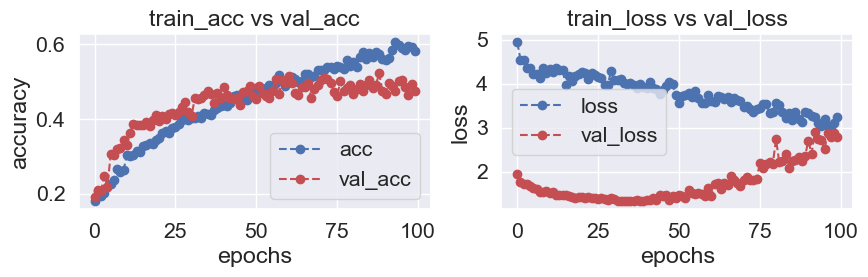

In [17]:
plot_accuracy_loss(history)

In [18]:
test_loss = model.evaluate(test_images, test_labels)

32/32 [==============================] - 2s 76ms/step - loss: 3.2555 - accuracy: 0.4420


# Vizualizando as imagens

In [19]:
def display_random_image(class_names, images, labels):
    """
    #Exibição de uma imagem aleatória
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

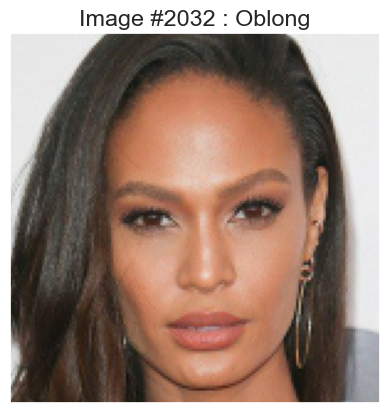

In [20]:
display_random_image(class_names, train_images, train_labels)

In [21]:
def display_examples(class_names, images, labels):
    """
    #Exibição de 25 imagens aleatórias e seus labels correspondentes
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

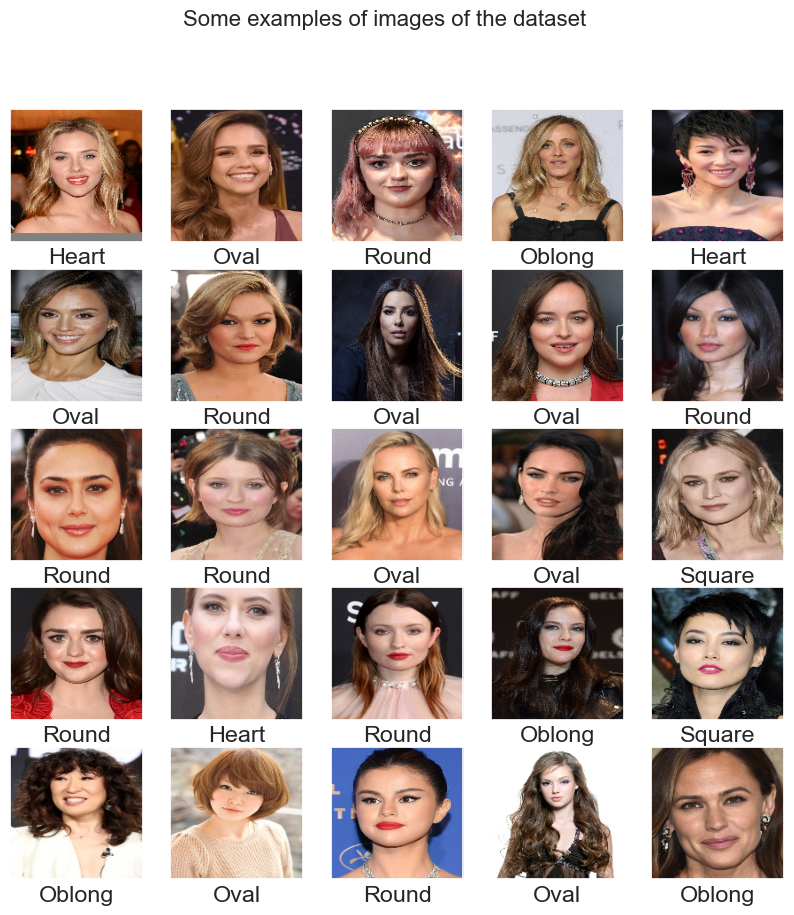

In [22]:
display_examples(class_names, train_images, train_labels)

32/32 [==============================] - 3s 75ms/step


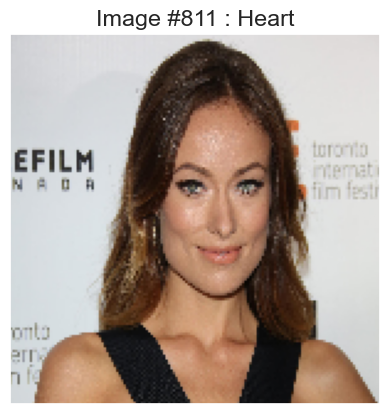

In [23]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [24]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

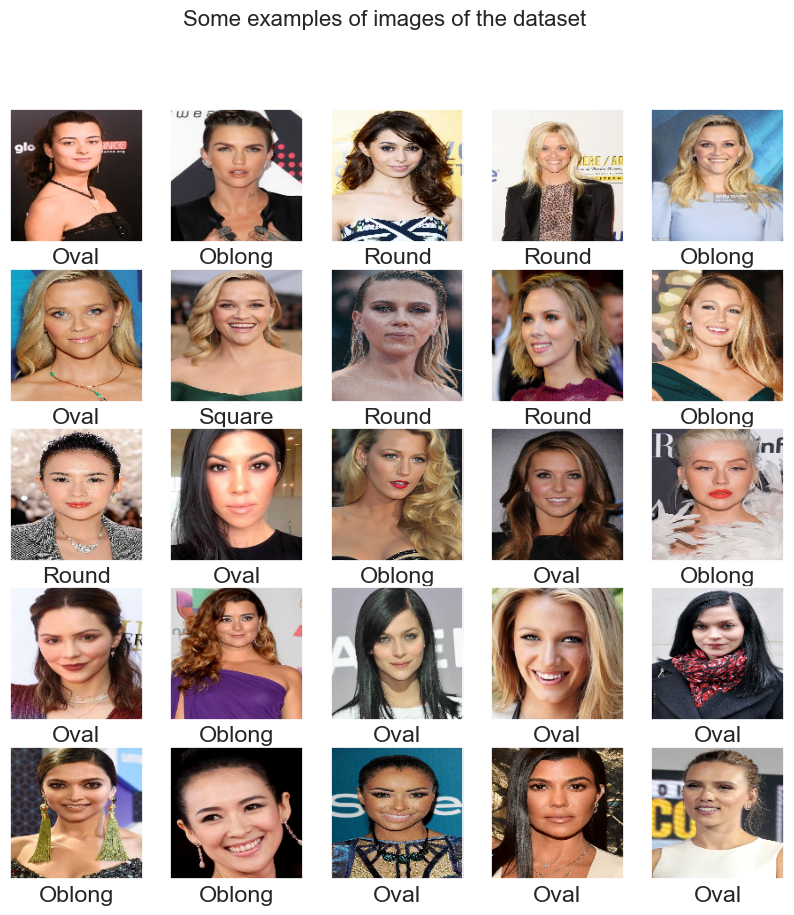

In [25]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

# Matriz de Confusão e Métricas de desempenho

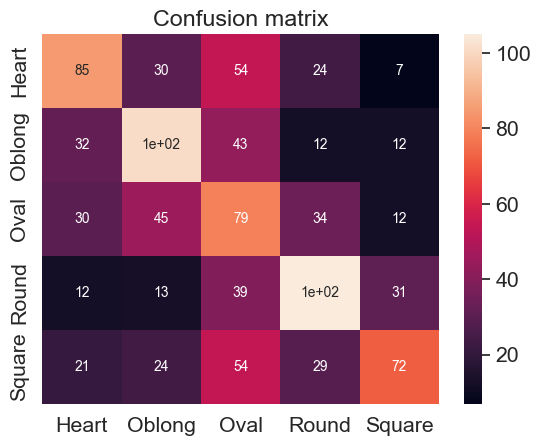

In [26]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [27]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels)
# Recall
from sklearn.metrics import recall_score
recall_score(test_labels, pred_labels, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(test_labels, pred_labels, average=None)

#f1-score
from sklearn.metrics import f1_score
f1_score(test_labels, pred_labels, average=None)

#Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(test_labels, pred_labels, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Heart       0.47      0.42      0.45       200
      Oblong       0.47      0.51      0.49       200
        Oval       0.29      0.40      0.34       200
       Round       0.51      0.53      0.52       200
      Square       0.54      0.36      0.43       200

    accuracy                           0.44      1000
   macro avg       0.46      0.44      0.44      1000
weighted avg       0.46      0.44      0.44      1000



In [29]:
model_path = 'Project5_automated/mid_model.keras'

# Save the model
model.save(model_path)